In [4]:
# 📌 Task 1: Dataset Selection and Preparation

import pandas as pd

# Load dataset
file_path = "C:/Users/Chong/Downloads/archive/sustainability_social_media_posts.csv"
df = pd.read_csv(file_path)

# --- Step 1: Display basic dataset information ---
print("===== Dataset Info =====")
print(df.info())

print("\n===== First 5 Rows =====")
print(df.head())

print("\n===== Summary of Numerical Columns =====")
print(df.describe())

# --- Step 2: Check for missing values ---
print("\n===== Missing Values per Column =====")
print(df.isnull().sum())

# --- Step 3: Handle missing values ---
# Strategy:
# - For numerical columns: fill with median (robust to outliers).
# - For categorical/text columns: fill with "Unknown".

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna("Unknown")

print("\n===== Missing Values After Cleaning =====")
print(df.isnull().sum())

# Save cleaned dataset for use in next tasks
df.to_csv('cleaned_sustainability_posts.csv', index=False)


===== Dataset Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   post_id              3144 non-null   int64 
 1   user_id              3144 non-null   object
 2   username             3144 non-null   object
 3   post_date            3144 non-null   object
 4   platform             3144 non-null   object
 5   hashtag              3144 non-null   object
 6   post_text            3144 non-null   object
 7   engagement_likes     3144 non-null   int64 
 8   engagement_shares    3144 non-null   int64 
 9   engagement_comments  3144 non-null   int64 
 10  user_followers       3144 non-null   int64 
 11  user_location        3144 non-null   object
 12  post_sentiment       3144 non-null   object
 13  climate_topic        3144 non-null   object
 14  call_to_action       3144 non-null   object
dtypes: int64(5), object(10)
memory

Task 1
4.	Identify and handle missing values appropriately. Explain your chosen strategy (e.g., filling with a default value, dropping rows, using interpolation).
Answer:
No missing values were found in any of the columns in this dataset and, therefore, no replacements needed to be done. Nonetheless, in case there were some missing values, in my plan, I would treat them by the type of data. In case of the numerical columns which include likes, shares or followers, I would substitute the missing with the median as the median is less vulnerable to outliers than the mean. In case of categorical or text columns like platform, hashtag, or post text, I would insert the missing values with the word Unknown, since deleting rows may result in the loss of information and interpolation cannot be applied to a text. The methodology will guarantee that the dataset is not biased by any extreme value, numerical characteristics are not skewed, and the categorical/text characteristics are not invalid.


In [9]:
# 📌 Task 2: Data Aggregation and Analysis

import pandas as pd

# Load cleaned dataset (from Task 1 output)
file_path = "C:/Users/Chong/Downloads/archive/sustainability_social_media_posts.csv"
df = pd.read_csv(file_path)

print("===== Task 2: Aggregations =====\n")

# 1. Number of posts per platform
posts_per_platform = df.groupby("platform")["post_id"].count().sort_values(ascending=False)
print("1️⃣ Posts per Platform:")
print(posts_per_platform, "\n")

# 2. Average engagement (likes, shares, comments) per platform
avg_engagement = df.groupby("platform")[["engagement_likes", "engagement_shares", "engagement_comments"]].mean().round(2)
print("2️⃣ Average Engagement per Platform:")
print(avg_engagement, "\n")

# 3. Top 10 hashtags by average likes
top_hashtags = df.groupby("hashtag")["engagement_likes"].mean().sort_values(ascending=False).head(10).round(2)
print("3️⃣ Top 10 Hashtags by Avg Likes:")
print(top_hashtags, "\n")

# 4. Posts count by sentiment
posts_by_sentiment = df["post_sentiment"].value_counts()
print("4️⃣ Posts Count by Sentiment:")
print(posts_by_sentiment, "\n")

# 5. Average followers vs engagement (using quantile bins)
followers_engagement = df.groupby(
    pd.qcut(df["user_followers"], 5), observed=True
)[["engagement_likes", "engagement_shares", "engagement_comments"]].mean().round(2)

print("5️⃣ Engagement based on User Followers (quintiles):")
print(followers_engagement, "\n")


===== Task 2: Aggregations =====

1️⃣ Posts per Platform:
platform
Medium       457
X            455
Reddit       452
Instagram    451
TikTok       446
Facebook     445
LinkedIn     438
Name: post_id, dtype: int64 

2️⃣ Average Engagement per Platform:
           engagement_likes  engagement_shares  engagement_comments
platform                                                           
Facebook            5203.92            1004.84               738.58
Instagram           5061.48             991.78               723.75
LinkedIn            4942.53             970.30               719.40
Medium              4933.13            1018.14               743.59
Reddit              4937.70             981.42               733.36
TikTok              4825.57            1024.59               728.89
X                   5143.03            1005.47               755.14 

3️⃣ Top 10 Hashtags by Avg Likes:
hashtag
#greengrowth          7106.95
#climatefund          6088.92
#energyrevolution     6012.46
#

Task 2
2.	Explain why you chose these aggregations and what insights you hoped to discover.
Answer:
In the initial aggregation, I chose the number of posts on each platform in order to determine the most active social media platform in sustainability conversations. This aids in knowing where most of the discussions are taking place.

In the second aggregation, I computed the average engagement, which was the sum of likes, shares and comments per platform. This gives insights on which platform creates greater interaction level where the audiences react differently in each platform.

In the third summation, I did the top 10 hashtags with the highest like counts. This also demonstrates the sustainability issues or campaigns that receive the biggest attention, which can be used to indicate the trending issues.

In the fourth aggregation, I examined the quantity of posts using sentiment category. This indicates whether the general conversation is more positive, neutral or negative and provides a general feel of the emotional tone of the discussions.

In the fifth aggregation, I compared user followers and activity by dividing the number of followers into groups of the quantile. This aids in establishing whether influencers who have a bigger follower count can generate more engagement consistently, or whether smaller accounts can also high impact.

Comprehensively, the aggregations were selected to investigate trends in the activity of the platform, audience engagement, hashtag popularity, sentiment distribution, and the impact of the influencer size on discussion.


In [6]:
# 📌 Task 3: Sentiment Analysis with Hugging Face (Final with df loading)

# Step 0 Reload data
import pandas as pd
df = pd.read_csv("C:/Users/Chong/Downloads/archive/sustainability_social_media_posts.csv")

# Step 1 Install dependencies (only needs to be done once)
!pip install transformers torch tqdm --quiet

from transformers import pipeline
from tqdm import tqdm
from IPython.display import display

# Step 2: Loading the Hugging Face sentiment pipeline
sentiment_pipeline = pipeline(
    "sentiment-analysis", 
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)

# Step 3 Ensure there are no NaNs
df["post_text"] = df["post_text"].fillna("")

# Step 4 Batch processing sentiment analysis
batch_size = 200
results = []

for i in tqdm(range(0, len(df), batch_size), desc="Processing Batches"):
    batch = df["post_text"].iloc[i:i+batch_size].tolist()
    batch_results = sentiment_pipeline(batch, truncation=True)
    results.extend(batch_results)

# Step 5 Store the results in a DataFrame
df["sentiment_raw"] = [r["label"] for r in results]       # Original output (e.g. "5 stars")
df["sentiment_score"] = df["sentiment_raw"].str[0].astype(int)  # number 1–5

# Step 6 Output the top 5 highest and lowest scores
print("===== Top 5 Highest Sentiment Score Posts =====")
top5 = df.sort_values(by="sentiment_score", ascending=False)[["post_text", "sentiment_score"]].head(5)
display(top5)

print("\n===== Top 5 Lowest Sentiment Score Posts =====")
bottom5 = df.sort_values(by="sentiment_score", ascending=True)[["post_text", "sentiment_score"]].head(5)
display(bottom5)

# Step 7 Save for Task 4
df.to_csv("sustainability_with_sentiment.csv", index=False)


Device set to use cpu
Processing Batches: 100%|██████████████████████████████████████████████████████████████| 16/16 [03:33<00:00, 13.37s/it]

===== Top 5 Highest Sentiment Score Posts =====


,post_text,sentiment_score
0,Climate justice engages global citizens with c...,5
1863,Climate change engages global citizens with co...,5
1854,Sustainable manufacturing reduces industrial w...,5
1855,Reforestation fights climate crisis through ac...,5
1856,Green technology improves health through innov...,5



===== Top 5 Lowest Sentiment Score Posts =====


,post_text,sentiment_score
2916,Zero-waste living eliminates unnecessary consu...,1
775,Climate activism requires change to empower co...,1
1956,Environmental justice movements address inequa...,1
1097,Zero-waste living eliminates unnecessary consu...,1
929,Zero-waste living eliminates unnecessary consu...,1


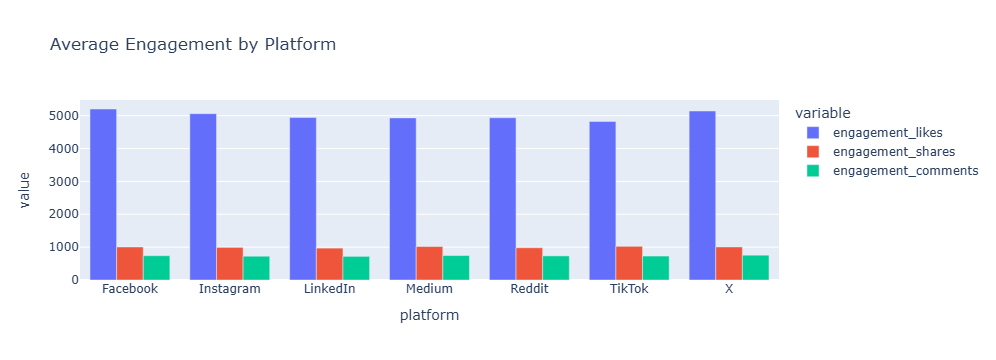

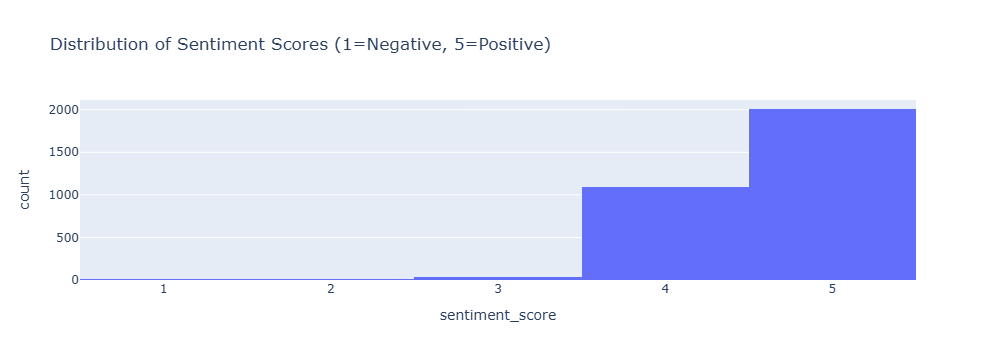

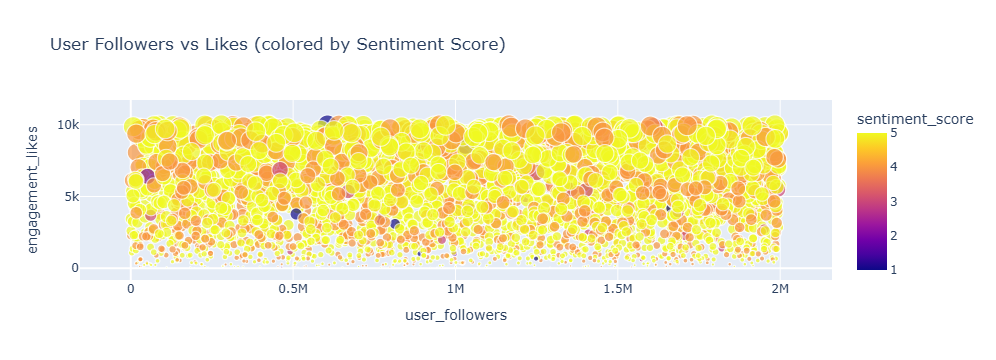

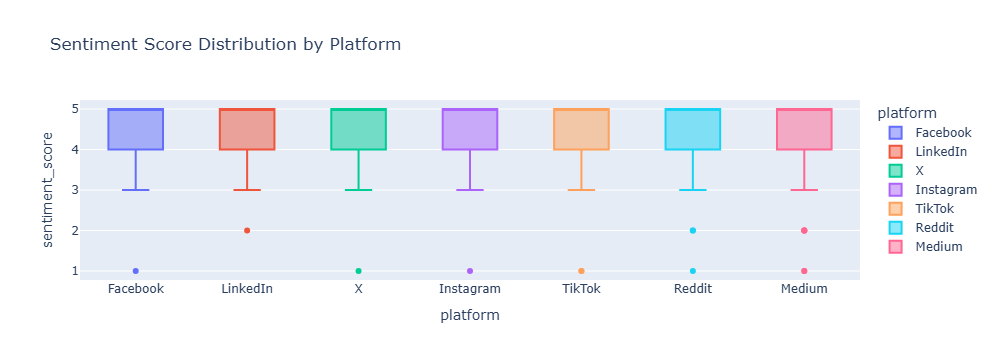

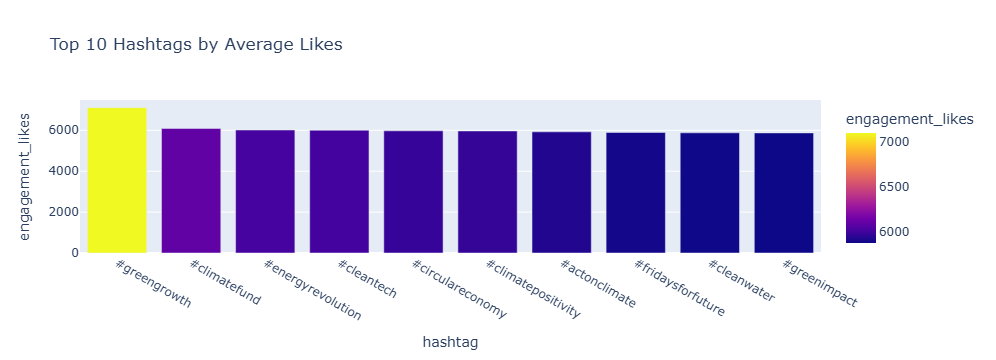

In [5]:
# 📌 Task 4: Interactive Visualization with Plotly (5 Charts)

import plotly.express as px

--- 1. Platform vs. Average Interaction (Bar Chart) ---
avg_engagement = df.groupby("platform")[["engagement_likes", "engagement_shares", "engagement_comments"]].mean().reset_index()

fig1 = px.bar(
    avg_engagement, 
    x="platform", 
    y=["engagement_likes", "engagement_shares", "engagement_comments"],
    barmode="group",
    title="Average Engagement by Platform"
)
fig1.show()

# --- 2. Sentiment Score Distribution (Histogram) ---
fig2 = px.histogram(
    df, 
    x="sentiment_score", 
    nbins=5,
    title="Distribution of Sentiment Scores (1=Negative, 5=Positive)"
)
fig2.show()

# --- 3. Followers vs. Likes (Scatter Plot) ---
fig3 = px.scatter(
    df, 
    x="user_followers", 
    y="engagement_likes", 
    color="sentiment_score",
    size="engagement_likes",
    hover_data=["platform", "hashtag"],
    title="User Followers vs Likes (colored by Sentiment Score)"
)
fig3.show()

# --- 4. Sentiment scores across different platforms (Box Plot) ---
fig4 = px.box(
    df, 
    x="platform", 
    y="sentiment_score", 
    color="platform",
    title="Sentiment Score Distribution by Platform"
)
fig4.show()

# --- 5. Top 10 Hot Hashtags (Bar Chart) ---
top_hashtags = df.groupby("hashtag")["engagement_likes"].mean().sort_values(ascending=False).head(10).reset_index()

fig5 = px.bar(
    top_hashtags, 
    x="hashtag", 
    y="engagement_likes", 
    title="Top 10 Hashtags by Average Likes",
    color="engagement_likes"
)
fig5.show()


Task 4:
3.	Provide a brief interpretation for each visualization, explaining what the plot reveals about the data.
Answer:
Visualization 1: Average Engagement by Platform (Bar Chart)
This graph indicates the average likes, shares, and comments on other social media. It discloses what platform is the most engaged and emphasizes where the sustainability discussion is more interactive.

Visualization 2: Distribution of Sentiment Scores (Histogram)
The histogram demonstrates the distributions of posts in various scores of sentiment (between negative and positive) (1 to 5). It shows the general positive, neutral, and negative nature of most conversations, and gives a picture of the emotional tone of sustainability posts.

Visualization 3: Scatter Plot (User Followers-User Likes).
The following scatter plot reveals how the number of user followers correlates with the number of likes their posts get. It demonstrates that the users who have more followers are invariably getting more engagement, as well as demonstrates whether smaller accounts can make a big impact.

Visualization 4: Sentiment Score Distribution by Platform (Box Plot)
The boxplot contrasts the sentiment scores of various platforms. It also shows the variation in audience tone across platforms like there may be a more positive overall tone with one platform and more range in another.

Visualization 5: Top 10 Hashtags by Average Likes (Bar Chart)
This chart shows the top 10 hashtags as per the average likes. It shows the sustainability subject that or sustainability campaigns are the most popular and productive in attracting the audience.
